In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from config import destination_zip, col_types

In [2]:
# plot options and style
sns.set_style('whitegrid')
# stacked bar chart colors
colors = ("#74C476", "#4DA75D", "#278A45", "#006D2C")

def set_chart_style(ax, title=None, ylabel=None, xlabel=None):
    """Returns the ax object with the following plt and ax settings applied"""
    plt.xticks(rotation=45)
    plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
    ax.set_facecolor('ivory')
    plt.figure(figsize=(18, 16))
    if title is not None:
        ax.set_title(title, fontsize=14, fontweight="bold")
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontweight="bold")
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontweight="bold")
    return ax

In [3]:
# read csv in zip pandas automatically selects the csv residing within the zip
accidents_df = pd.read_csv(destination_zip, 
                           usecols=col_types.keys(), 
                           dtype=col_types, 
                           parse_dates=['Start_Time'],
                           infer_datetime_format=True)

accidents_df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Sunrise_Sunset
0,A-426,2,2016-03-01 05:05:42,39.945835,-83.061295,Columbus,Franklin,OH,43204-3157,Night
1,A-427,2,2016-03-01 06:14:44,39.591389,-84.229485,Miamisburg,Montgomery,OH,45342-4940,Night
2,A-428,2,2016-03-01 07:30:18,39.790302,-84.213905,Dayton,Montgomery,OH,45405-3032,Day
3,A-429,2,2016-03-01 07:31:53,39.927441,-83.056198,Columbus,Franklin,OH,43223,Day
4,A-430,2,2016-03-01 07:46:03,39.946892,-82.915489,Columbus,Franklin,OH,43209-3047,Day


In [4]:
# Shared variables
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
severity_values = [1, 2, 3, 4]

In [5]:
# Chris's code starts here

In [6]:
#Isolate Start Time and sort by day of week
# TODO unnecessary??
accidents_df["Start_Time"].dt.dayofweek.value_counts()

1    572369
4    572048
2    567263
3    558199
0    533423
5    185322
6    162539
Name: Start_Time, dtype: int64

In [7]:
#Create DataFrame to store number of accidents per day of week
week_days_df = pd.DataFrame(accidents_df['Start_Time'].dt.dayofweek.value_counts())
# Sort days of the week from 0-6
week_days_df.sort_index(inplace=True)
# Replace day of week number with value from days_of_week list
week_days_df.set_index(pd.Index(days_of_week), inplace=True)
week_days_df

,Start_Time
Monday,533423
Tuesday,572369
Wednesday,567263
Thursday,558199
Friday,572048
Saturday,185322
Sunday,162539


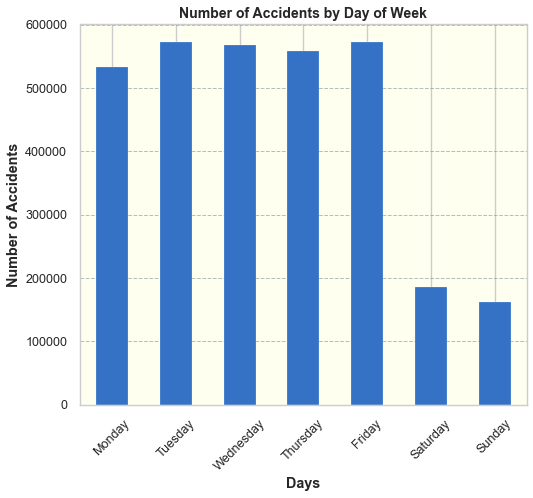

<Figure size 1296x1152 with 0 Axes>

In [8]:
#Create bargraph from DataFrame
plotdata = week_days_df.plot.bar(legend=False)
plotdata = set_chart_style(plotdata, title="Number of Accidents by Day of Week", ylabel="Number of Accidents", xlabel="Days")

In [9]:
#Make a DataFrame to track on severity of crash by day of week
# Set up dataframe for pivot table with all severity/day combinations
days = days_of_week * len(severity_values)
severity = np.repeat(severity_values,len(days_of_week))
severity_df = pd.DataFrame(zip(severity, days), columns=['Severity', 'Days'])

# Get count of accidents for each severity/day combinations 
vals = []
for index, row in severity_df.iterrows():
    vals.append(accidents_df[(accidents_df['Severity'] == row['Severity']) & (accidents_df['Start_Time'].dt.dayofweek == days_of_week.index(row['Days']))]['ID'].count())
severity_df.insert(2, 'Value', vals)
severity_df

,Severity,Days,Value
0,1,Monday,211
1,1,Tuesday,177
2,1,Wednesday,200
3,1,Thursday,196
4,1,Friday,243
5,1,Saturday,93
6,1,Sunday,67
7,2,Monday,373240
8,2,Tuesday,401512
9,2,Wednesday,397963


In [10]:
#Define the summary table
pivot_df = severity_df.pivot(index='Days', columns='Severity', values='Value')
# Sort by days_of_week
pivot_df = pivot_df.loc[days_of_week]
pivot_df

Severity,1,2,3,4
Days,,,,
Monday,211,373240,144869,15103
Tuesday,177,401512,155181,15499
Wednesday,200,397963,154146,14954
Thursday,196,387944,155172,14887
Friday,243,393894,162303,15608
Saturday,93,95610,79288,10331
Sunday,67,83170,69476,9826


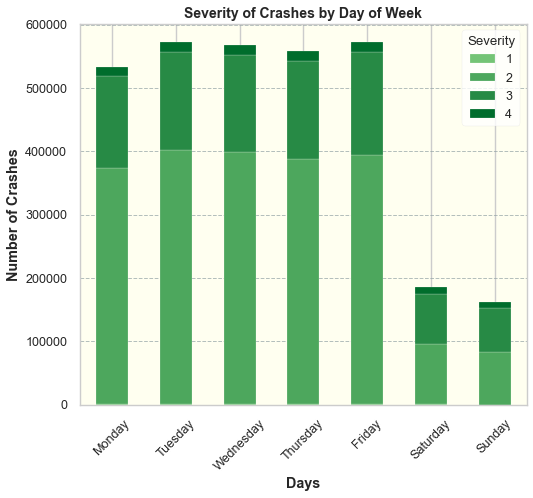

<Figure size 1296x1152 with 0 Axes>

In [11]:
# Create stacked bar chart
pivot_df_plot = pivot_df.plot.bar(stacked=True, color = colors)
pivot_df_plot = set_chart_style(pivot_df_plot, title="Severity of Crashes by Day of Week", ylabel="Number of Crashes", xlabel="Days")

In [12]:
# Chris's code ends here

In [13]:
# Ken's code starts here

#Grouping Data Into Seasons
# In order to group dates into seasons, we need to define seasons then group the dates into seasons column using  Meteorological seasons classifications for northern hemisphere
#Spring runs from March 1 to May 31;
#Summer runs from June 1 to Aug.31;
#Fall (Autumn) runs from September 1st thru Nov.30th and
#Winter runs from December 1 to 28 Feb


month_seasons = {1: 'winter',
                 2: 'winter',
                 3: 'spring',
                 4: 'spring',
                 5: 'spring',
                 6: 'summer',
                 7: 'summer',
                 8: 'summer',
                 9: 'fall',
                 10: 'fall',
                 11: 'fall',
                 12: 'winter'}

accidents_df['seasons'] = pd.to_datetime(accidents_df['Start_Time']).dt.month.map(month_seasons)
accidents_df.tail(50000)

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Sunrise_Sunset,seasons
3101163,A-3463781,2,2019-05-24 17:42:00,41.026939,-111.945717,Kaysville,Davis,UT,84037,Day,spring
3101164,A-3463782,2,2019-05-24 17:51:00,38.756321,-111.382690,Richfield,Sevier,UT,84701,Day,spring
3101165,A-3463783,2,2019-05-24 18:10:00,40.122101,-111.659286,Spanish Fork,Utah,UT,84660,Day,spring
3101166,A-3463784,3,2019-05-24 19:53:13,39.823101,-104.967300,Denver,Adams,CO,80229,Day,spring
3101167,A-3463785,2,2019-05-24 20:29:00,40.749771,-111.605103,Park City,Summit,UT,84098,Day,spring
...,...,...,...,...,...,...,...,...,...,...,...
3151158,A-3513776,2,2019-08-23 18:03:25,34.002480,-117.379356,Riverside,Riverside,CA,92501,Day,summer
3151159,A-3513777,2,2019-08-23 19:11:30,32.766960,-117.148064,San Diego,San Diego,CA,92108,Day,summer
3151160,A-3513778,2,2019-08-23 19:00:21,33.775452,-117.847794,Orange,Orange,CA,92866,Day,summer
3151161,A-3513779,2,2019-08-23 19:00:21,33.992458,-118.403023,Culver City,Los Angeles,CA,90230,Day,summer


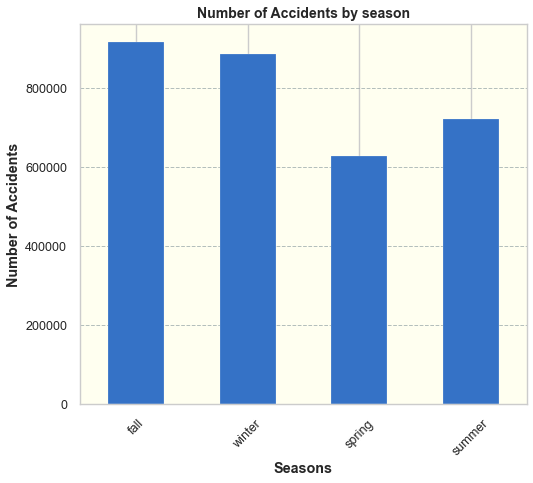

<Figure size 1296x1152 with 0 Axes>

In [14]:
# Sort  Accidents into seasons 

# Define season order
season_order = ['fall', 'winter', 'spring', 'summer']

# group by seasons, get count of ID (really just the accident count per season)
season_group = accidents_df.groupby(['seasons'])['ID'].count().reset_index()

# order values based on column season, and season_order
season_group = season_group.set_index('seasons').loc[season_order]

# plot bar chart
# TODO differing titles? Should be number of accidents?
# season_group = season_group.plot.bar(rot="vertical", title="Number of Accidents by season", legend=False)
# plt.title("Severity Of Accidents By Season", fontsize=14, fontweight="bold")
# plt.xlabel("Seasons", fontweight="bold")
# plt.ylabel("Number of Accidents", fontweight="bold")

# # Add additional formatting
# plt.xticks(rotation=45)
season_accidents = season_group.plot.bar(legend=False)
season_accidents = set_chart_style(season_accidents, title="Number of Accidents by season", ylabel="Number of Accidents", xlabel="Seasons")

In [15]:
# TODO is this needed?
Analysis_Pivot_Table = pd.pivot_table(accidents_df, index = 'ID', columns = 'seasons', values = 'Severity', aggfunc = 'count') 

Analysis_Pivot_Table

seasons,fall,spring,summer,winter
ID,,,,
A-1000,NaN,NaN,1.0,NaN
A-10000,NaN,NaN,NaN,1.0
A-100000,NaN,1.0,NaN,NaN
A-1000000,NaN,NaN,1.0,NaN
A-1000001,NaN,NaN,1.0,NaN
...,...,...,...,...
A-999995,NaN,NaN,1.0,NaN
A-999996,NaN,NaN,1.0,NaN
A-999997,NaN,NaN,1.0,NaN


In [16]:
# TODO duplicate?
# Ken's code starts here
#Grouping Data Into Seasons
# In order to group dates into seasons, we need to define seasons then group the dates into seasons column using  Meteorological seasons classifications for northern hemisphere
#Spring runs from March 1 to May 31;
#Summer runs from June 1 to Aug.31;
#Fall (Autumn) runs from September 1st thru Nov.30th and
#Winter runs from December 1 to 28 Feb


month_seasons = {1: 'winter',
                 2: 'winter',
                 3: 'spring',
                 4: 'spring',
                 5: 'spring',
                 6: 'summer',
                 7: 'summer',
                 8: 'summer',
                 9: 'fall',
                 10: 'fall',
                 11: 'fall',
                 12: 'winter'}

accidents_df['seasons'] = pd.to_datetime(accidents_df['Start_Time']).dt.month.map(month_seasons)
accidents_df.tail(50000)

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Sunrise_Sunset,seasons
3101163,A-3463781,2,2019-05-24 17:42:00,41.026939,-111.945717,Kaysville,Davis,UT,84037,Day,spring
3101164,A-3463782,2,2019-05-24 17:51:00,38.756321,-111.382690,Richfield,Sevier,UT,84701,Day,spring
3101165,A-3463783,2,2019-05-24 18:10:00,40.122101,-111.659286,Spanish Fork,Utah,UT,84660,Day,spring
3101166,A-3463784,3,2019-05-24 19:53:13,39.823101,-104.967300,Denver,Adams,CO,80229,Day,spring
3101167,A-3463785,2,2019-05-24 20:29:00,40.749771,-111.605103,Park City,Summit,UT,84098,Day,spring
...,...,...,...,...,...,...,...,...,...,...,...
3151158,A-3513776,2,2019-08-23 18:03:25,34.002480,-117.379356,Riverside,Riverside,CA,92501,Day,summer
3151159,A-3513777,2,2019-08-23 19:11:30,32.766960,-117.148064,San Diego,San Diego,CA,92108,Day,summer
3151160,A-3513778,2,2019-08-23 19:00:21,33.775452,-117.847794,Orange,Orange,CA,92866,Day,summer
3151161,A-3513779,2,2019-08-23 19:00:21,33.992458,-118.403023,Culver City,Los Angeles,CA,90230,Day,summer


Text(0, 0.5, 'Number of Accidents')

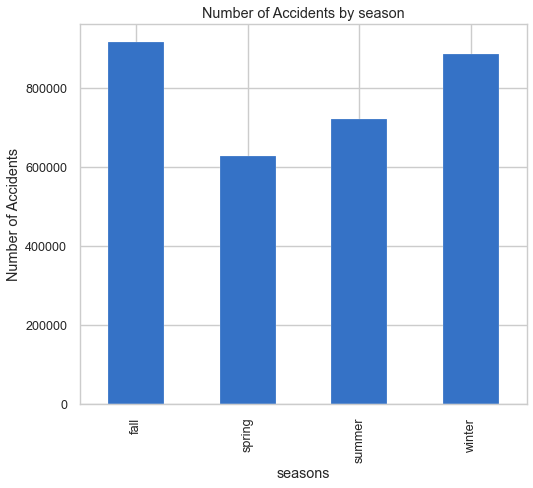

In [17]:
# TODO duplicate?
#Create DataFrame to group number of accidents per season
# separate season data into bins
# Create Two bins for 'Winter' for being both at the beginning and end of the year.

season_group = accidents_df.groupby(['seasons'])


season_group = season_group['ID'].count().plot.bar(rot="vertical", title="Number of Accidents by season", legend=False)
season_group.set_ylabel("Number of Accidents")

In [18]:
# convert the value counts back into a dataframe
# group by seasons and severity, get value counts, turn back into data frame
seasons=pd.DataFrame(accidents_df.groupby(['seasons'])['Severity'].value_counts())
# sort by severity
seasons.sort_index(inplace=True)

# using reset_index, change season/severity from idices to columns
seasons = seasons.rename(columns={'Severity': 'Accidents'}).reset_index()

seasons

,seasons,Severity,Accidents
0,fall,1,285
1,fall,2,636912
2,fall,3,254117
3,fall,4,24707
4,spring,1,193
5,spring,2,412625
6,spring,3,194273
7,spring,4,21168
8,summer,1,275
9,summer,2,470208


In [19]:
# create pivot table from above dataframe
season_pivot = seasons.pivot(index='seasons', columns='Severity', values='Accidents')
season_pivot

Severity,1,2,3,4
seasons,,,,
fall,285,636912,254117,24707
spring,193,412625,194273,21168
summer,275,470208,228004,23437
winter,434,613588,244041,26896


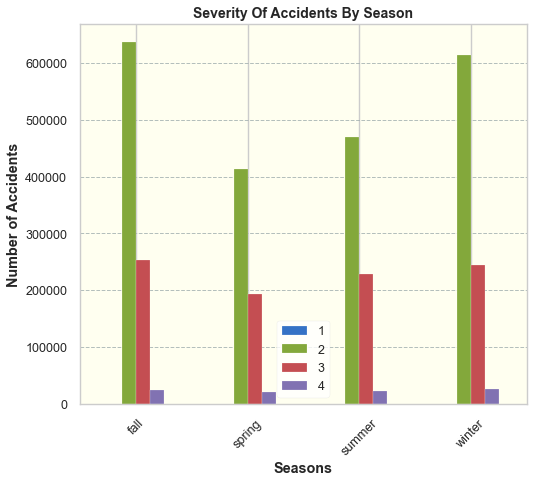

<Figure size 1296x1152 with 0 Axes>

In [20]:
# Side By Side Bar Chart 

season_pivot_cluster = season_pivot.plot(kind= 'bar')
season_pivot_cluster.legend(loc='best')
season_pivot_cluster = set_chart_style(season_pivot_cluster, title="Severity Of Accidents By Season", ylabel="Number of Accidents", xlabel="Seasons")
# plt.title("Severity Of Accidents By Season", fontsize=14, fontweight="bold")
# plt.xlabel("Seasons", fontweight="bold")
# plt.ylabel("Number of Accidents", fontweight="bold")


# Add additional formatting
# plt.xticks(rotation=45)

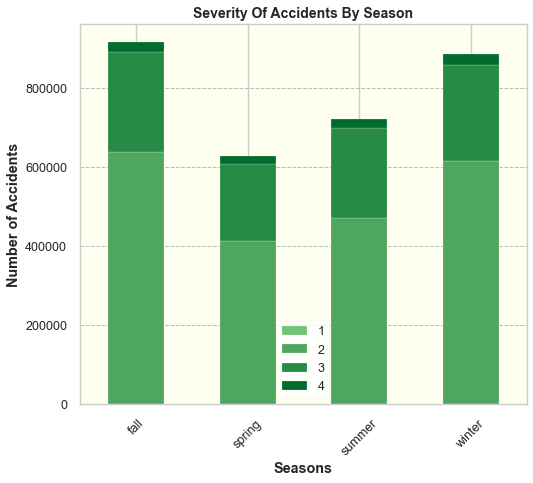

<Figure size 1296x1152 with 0 Axes>

In [21]:
# Stacked Bar Chart
season_pivot_stacked = season_pivot.plot(kind= 'bar',stacked=True, color=colors)
plt.legend(loc='best')
season_pivot_stacked = set_chart_style(season_pivot_stacked, title="Severity Of Accidents By Season", ylabel="Number of Accidents", xlabel="Seasons")
# plt.title("Severity Of Accidents By Season", fontsize=14, fontweight="bold")
# plt.xlabel("Seasons", fontweight="bold")
# plt.ylabel("Number of Accidents", fontweight="bold")



# Add additional formatting
# plt.xticks(rotation=45)

# Ken's code ends here

# Colleen's code starts here

In [22]:
# TIME QUESTION 1: Does the time of day (early morning, rush hour, late night) affect NUMBER of accidents?

In [23]:
# Add a new column to the original DataFrame to parse out hours only from Start_Time column
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
accidents_df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Sunrise_Sunset,seasons,Hour
0,A-426,2,2016-03-01 05:05:42,39.945835,-83.061295,Columbus,Franklin,OH,43204-3157,Night,spring,5
1,A-427,2,2016-03-01 06:14:44,39.591389,-84.229485,Miamisburg,Montgomery,OH,45342-4940,Night,spring,6
2,A-428,2,2016-03-01 07:30:18,39.790302,-84.213905,Dayton,Montgomery,OH,45405-3032,Day,spring,7
3,A-429,2,2016-03-01 07:31:53,39.927441,-83.056198,Columbus,Franklin,OH,43223,Day,spring,7
4,A-430,2,2016-03-01 07:46:03,39.946892,-82.915489,Columbus,Franklin,OH,43209-3047,Day,spring,7


In [24]:
#Create a dataframe to store number of accidents per hour of the day
accidents_per_hour = pd.DataFrame(accidents_df['Hour'].value_counts())
accidents_per_hour.sort_index(inplace=True)
accidents_per_hour

,Hour
0,24990
1,19380
2,20309
3,19854
4,57260
5,89151
6,181222
7,292776
8,302502
9,186655


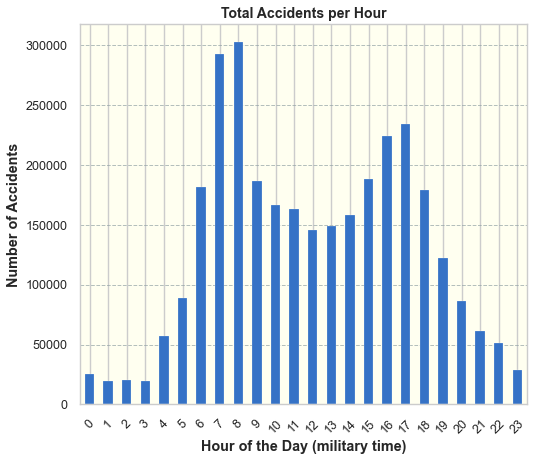

<Figure size 1296x1152 with 0 Axes>

In [25]:
# TIME QUESTION 1 - VISUALIZATION: 
# Create a graph to show total # of accidents in 1 hour increments over 24 hrs timeframe
#     What time of day do most accidents occur?
#     How does this help identify time periods such as AM/PM rush hours?

plotdata1 = accidents_per_hour.plot.bar(legend=False)
plotdata1 = set_chart_style(plotdata1, title="Total Accidents per Hour", ylabel="Number of Accidents", xlabel="Hour of the Day (military time)")
# plotdata1.set_title("Total Accidents per Hour", fontsize=14, fontweight="bold")
# plotdata1.set_xlabel("Hour of the Day (military time)", fontweight="bold")
# plotdata1.set_ylabel("# of Accidents", fontweight="bold")
# plotdata1.set_facecolor('ivory')

# # Add additional formatting
# plt.xticks(rotation=70)
# plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

In [26]:
# TIME QUESTION 2: Does the time of day (early morning, rush hour, late night) affect SEVERITY of accidents?

In [27]:
# Group Data Into Time Periods
# In order to group accidents into time periods, we need to define time periods based on the above analysis.
# Early Morning: 0,1,2,3,4,5
# AM Rush Hour: 6,7,8,9
# Mid Day: 10,11,12,13,14
# PM Rush Hour: 15,16,17,18
# Late Evening: 19,20,21,22,23

# Establish bins for time periods
bins = [0,6,10,15,19,24]
    
# Create the names for the time period bins
time_period = ["Early Morning", "AM Rush Hour", "Mid Day", "PM Rush Hour", "Late Evening"]

# Categorize the hours of the day using the time period bins and pd.cut()
accidents_df["Time Period"]=pd.cut(accidents_df["Hour"],bins,labels=time_period)

#Display Time Periods Table
accidents_df

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Sunrise_Sunset,seasons,Hour,Time Period
0,A-426,2,2016-03-01 05:05:42,39.945835,-83.061295,Columbus,Franklin,OH,43204-3157,Night,spring,5,Early Morning
1,A-427,2,2016-03-01 06:14:44,39.591389,-84.229485,Miamisburg,Montgomery,OH,45342-4940,Night,spring,6,Early Morning
2,A-428,2,2016-03-01 07:30:18,39.790302,-84.213905,Dayton,Montgomery,OH,45405-3032,Day,spring,7,AM Rush Hour
3,A-429,2,2016-03-01 07:31:53,39.927441,-83.056198,Columbus,Franklin,OH,43223,Day,spring,7,AM Rush Hour
4,A-430,2,2016-03-01 07:46:03,39.946892,-82.915489,Columbus,Franklin,OH,43209-3047,Day,spring,7,AM Rush Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151158,A-3513776,2,2019-08-23 18:03:25,34.002480,-117.379356,Riverside,Riverside,CA,92501,Day,summer,18,PM Rush Hour
3151159,A-3513777,2,2019-08-23 19:11:30,32.766960,-117.148064,San Diego,San Diego,CA,92108,Day,summer,19,PM Rush Hour
3151160,A-3513778,2,2019-08-23 19:00:21,33.775452,-117.847794,Orange,Orange,CA,92866,Day,summer,19,PM Rush Hour
3151161,A-3513779,2,2019-08-23 19:00:21,33.992458,-118.403023,Culver City,Los Angeles,CA,90230,Day,summer,19,PM Rush Hour


In [28]:
# Sense check count by type and sum of severtiy of accidents
accidents_per_hour = pd.DataFrame(accidents_df['Severity'].value_counts())
accidents_per_hour

,Severity
2,2133333
3,920435
4,96208
1,1187


In [29]:
# TODO keep?
accidents_per_hour.sum()

Severity    3151163
dtype: int64

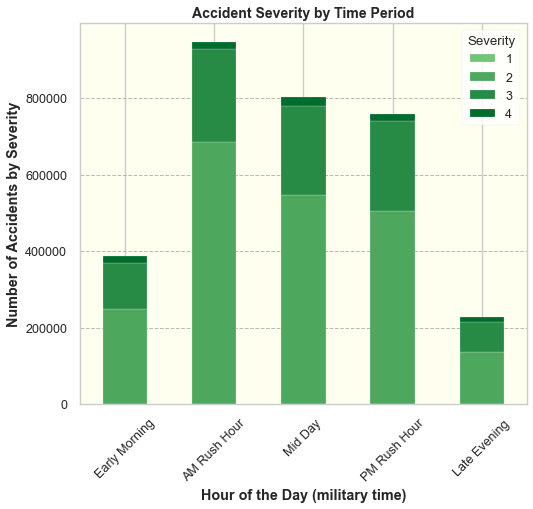

<Figure size 1296x1152 with 0 Axes>

In [30]:
# TODO too many things in one cell?
# TIME QUESTION 2 - VISUALIZATION:
# Create a bar graph that shows severity ranking of accidents during peak timeframes 
#   (in other words, during peak accident times (ie. rush hours) when are the most severe accidents likely to occur?)

# Sort by Time Period and Severity, get value counts, convert back into a dataframe
time_period=pd.DataFrame(accidents_df.groupby(['Time Period'])['Severity'].value_counts())

# Sort by severity
time_period.sort_index(inplace=True)

# Rename value counts, because the index and column had conflicting names. Reset_index pushes the indices into columns
time_period = time_period.rename(columns={'Severity': 'Accidents'}).reset_index()

# Turn into a pivot table
time_period_pivot = time_period.pivot(index='Time Period', columns='Severity', values='Accidents')

# Create a graph using the time period pivot table
time_period_stacked = time_period_pivot.plot.bar(stacked=True, color=colors)
time_period_stacked = set_chart_style(time_period_stacked, title="Accident Severity by Time Period", ylabel="Number of Accidents by Severity", xlabel="Hour of the Day (military time)")

# #Formatting
# plt.title("Accident Severity by Time Period", fontsize=14, fontweight="bold")
# plt.xlabel("Hour of the Day (military time)", fontweight="bold")
# plt.ylabel("# of Accidents by Severity", fontweight="bold")

# # Add additional formatting
# plt.xticks(rotation=70)
# plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)


# Colleen's code ends here

In [31]:
# Eric's code starts here

# Hypothesis Testing
***
__Our Hypothesis:__
> The number of accidents differ per season.

__Null Hypothesis:__
> The occurrence of accidents are distributed equally across seasons. 

***
We start by getting the counts of accidents in each season

In [32]:
fall = {'Fall': accidents_df[accidents_df['seasons'] == 'fall'].count()}
winter = {'Winter': accidents_df[accidents_df['seasons'] == 'winter'].count()}
spring = {'Spring': accidents_df[accidents_df['seasons'] == 'spring'].count()}
summer = {'Summer': accidents_df[accidents_df['seasons'] == 'summer'].count()}
all_seasons = [fall, winter, spring, summer]

## ANOVA Test
***
The ANOVA test is utilized as a starting point simply to see if there's any statistically significant <br>differences between the seasons. If the $p-value>0.05$, we can stop looking at seasonal differences.

In [33]:
four_sesaon_anova = st.f_oneway(fall['Fall'], winter['Winter'], spring['Spring'], summer['Summer'])[1]
print(f"ANOVA p-value for all four seasons: {four_sesaon_anova}")

ANOVA p-value for all four seasons: 1.1503799892898439e-88


## Further Testing
***
The $p-value$ for comparing all four seasons is $1.37e^{-129}$ <br>Clearly, this is far less than $0.05$, indicating a need for further testing.
***

In [34]:
p_values = []

# Loop through all combinations of seasons
for season in all_seasons:
    season_name = [*season][0]
    for otherseason in [val for val in all_seasons if val.keys() != season.keys()]:
        otherseason_name = [*otherseason][0]
        # run the ANOVA test on each season pair
        p_values.append(st.f_oneway(season[season_name], otherseason[otherseason_name])[1])
        
        print(f"""ANOVA test between {season_name} and {otherseason_name}
        P Value: {p_values[-1]}""")
print(f"\nThe largest p-value between seasons is {max(p_values)}")

ANOVA test between Fall and Winter
        P Value: 9.483499598051239e-24
ANOVA test between Fall and Spring
        P Value: 1.1068722279804652e-48
ANOVA test between Fall and Summer
        P Value: 5.50462229060606e-44
ANOVA test between Winter and Fall
        P Value: 9.483499598051239e-24
ANOVA test between Winter and Spring
        P Value: 1.371815729703989e-46
ANOVA test between Winter and Summer
        P Value: 2.3564296543534986e-41
ANOVA test between Spring and Fall
        P Value: 1.1068722279804652e-48
ANOVA test between Spring and Winter
        P Value: 1.3718157297173734e-46
ANOVA test between Spring and Summer
        P Value: 1.3442873734996026e-37
ANOVA test between Summer and Fall
        P Value: 5.504622290634521e-44
ANOVA test between Summer and Winter
        P Value: 2.3564296543534986e-41
ANOVA test between Summer and Spring
        P Value: 1.3442873734996026e-37

The largest p-value between seasons is 9.483499598051239e-24


## Conclusion
***
The largest $p-value$ from any combination of seasons is $4.60e^{-48}$, which is still far smaller than $0.05$ <br> Based on these results, we can confidently reject the null hypothesis of all seasonal accidents being distributed equally, 

In [35]:
# Eric's code ends here

In [36]:
# TODO Do we want to leave our named code cells?
# Do we want to show all the tables as we go? Hide with double click
# Do we want to remove all columns from csv that we aren't using in our analysis?
# How do we want to style our charts
# Reorder??